In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных по корректному коду

Загрузим данные по коду с ошибками без разбиения на обучающую, валидационную и тестовую выборки.

In [2]:
path_to_data = '/home/kks/zephyr_data/stable_code/'

In [3]:
source_code_data = pd.read_pickle(path_to_data + 'top_proj_code_samples_v4_metrics.pickle')

In [4]:
metric_names = ['cc_before', 'is function_before', 
                'cc_rank_before', 'N1_before', 'N2_before',
                'bugs_before', 'calculated_length_before',
                'difficulty_before', 'effort_before', 'h1_before', 'h2_before',
                'length_before', 'time_before',
                'vocabulary_before', 'volume_before',
                'blank_before', 'comments_before',
                'lloc_before', 'loc_before',
                'multi_before', 'single_comments_before',
                'sloc_before', 'MI_before']

# Описание датасета с ошибками на уровне метрик

Все описываемые ниже метрики вычислены в библиотеке [Radon](https://radon.readthedocs.io/en/latest/). По этой ссылке можно найти пояснения к метрикам. Метрики достаточно стандарные, и включают в себя

- сырые метрики, вычисляемые по тексту сниппета
- метрики Халстеда, описывающие структурную сложность
- метрики сложности кода (цикломатическая сложность и индекс исправляемости кода)

# Сырые метрики

## Длина кода сниппетов (число строк)

Посмотрим на распределение сниппетов стабильного кода по длине (метрика source lines of code, sloc). При расчете этой метрики учитываются только строки с исходным кодом. Подсчитаем различные статистики по этой метрике.

In [6]:
print(f'Среднее значение числа строк кода равно {source_code_data["sloc_before"].mean()}.')
print(f'Медиана числа строк кода равна {source_code_data["sloc_before"].median()}.')
print(f'С.к.о числа строк кода равно {source_code_data["sloc_before"].std()}.')
print(f'25-й персентиль числа строк кода равен {source_code_data["sloc_before"].quantile(q=0.25)}.')
print(f'75-й персентиль числа строк кода равен {source_code_data["sloc_before"].quantile(q=0.75)}.')
print(f'90-й персентиль числа строк кода равен {source_code_data["sloc_before"].quantile(q=0.90)}.')
print(f'Минимум числа строк кода равен {source_code_data["sloc_before"].min()}.')
print(f'Максимум числа строк кода равен {source_code_data["sloc_before"].max()}.')

Среднее значение числа строк кода равно 12.472196930959074.
Медиана числа строк кода равна 6.0.
С.к.о числа строк кода равно 91.87905521340579.
25-й персентиль числа строк кода равен 3.0.
75-й персентиль числа строк кода равен 14.0.
90-й персентиль числа строк кода равен 28.0.
Минимум числа строк кода равен 1.0.
Максимум числа строк кода равен 165021.0.


Таким образом, 90% сниппетов кода с ошибками имеют длину до 28 строк, а 75% из них - длину до 14.

## Число утверждений (statements)

Подсчитаем количество логических утверждений в коде сниппетов. Одна строка кода может содержать несколько логических утверждений.

In [7]:
print(f'Среднее значение числа утверждений равно {source_code_data["lloc_before"].mean()}.')
print(f'Медиана числа утверждений равна {source_code_data["lloc_before"].median()}.')
print(f'С.к.о числа утверждений равно {source_code_data["lloc_before"].std()}.')
print(f'25-й персентиль числа утверждений равен {source_code_data["lloc_before"].quantile(q=0.25)}.')
print(f'75-й персентиль числа утверждений равен {source_code_data["lloc_before"].quantile(q=0.75)}.')
print(f'90-й персентиль числа утверждений равен {source_code_data["lloc_before"].quantile(q=0.90)}.')
print(f'Минимум числа утверждений равен {source_code_data["lloc_before"].min()}.')
print(f'Максимум числа утверждений равен {source_code_data["lloc_before"].max()}.')

Среднее значение числа утверждений равно 10.514437735150581.
Медиана числа утверждений равна 6.0.
С.к.о числа утверждений равно 81.85919777516426.
25-й персентиль числа утверждений равен 3.0.
75-й персентиль числа утверждений равен 12.0.
90-й персентиль числа утверждений равен 23.0.
Минимум числа утверждений равен 2.0.
Максимум числа утверждений равен 165021.0.


Посмотрим на взаимное распределение числа строк и числа утверждений:

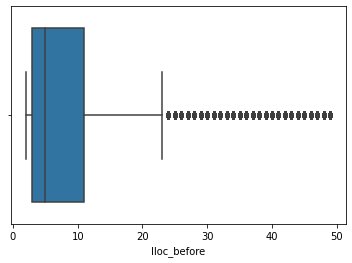

In [8]:
sns.boxplot(x='lloc_before',
            data=source_code_data.loc[source_code_data['lloc_before'] < 50]);

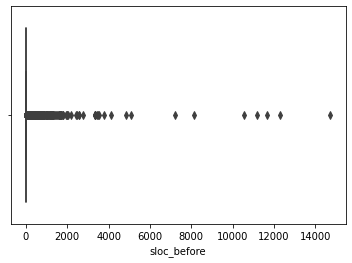

In [9]:
sns.boxplot(x='sloc_before',
            data=source_code_data.loc[source_code_data['lloc_before'] < 50]);

Даже при ограничении на число строк кода стабильный код содержит много сниппетов, содержащих строки кода, включающие много утверждений.

Посмотрим на отношение:

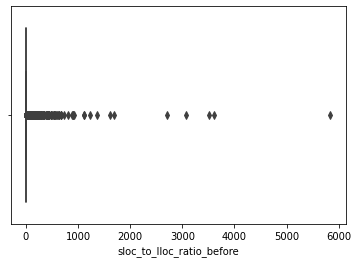

In [10]:
source_code_data['sloc_to_lloc_ratio_before'] = source_code_data['sloc_before'] / source_code_data['lloc_before']
sns.boxplot(x='sloc_to_lloc_ratio_before',
            data=source_code_data);

Уберем выбросы:

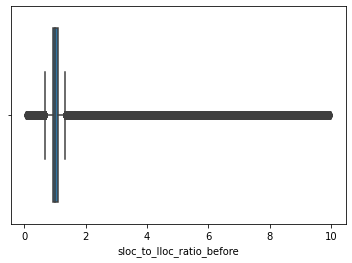

In [16]:
sns.boxplot(x='sloc_to_lloc_ratio_before',
            data=source_code_data.loc[source_code_data['sloc_to_lloc_ratio_before'] < 10]);

In [11]:
print(f'Медиана отношения равна {source_code_data["sloc_to_lloc_ratio_before"].median()}.')

Медиана отношения равна 1.0.


Таким образом, половина сниппетов имеют отношение числа строк кода к числу утверждений близкое к 1, т.е. в одной строке расположено примерно одно утверждение.

## Число однострочных комментариев

In [12]:
print(f'Среднее значение числа однострочных комментариев равно {source_code_data["single_comments_before"].mean()}.')
print(f'Медиана числа однострочных комментариев равна {source_code_data["single_comments_before"].median()}.')
print(f'С.к.о числа однострочных комментариев равно {source_code_data["single_comments_before"].std()}.')
print(f'25-й персентиль числа однострочных комментариев равен {source_code_data["single_comments_before"].quantile(q=0.25)}.')
print(f'75-й персентиль числа однострочных комментариев равен {source_code_data["single_comments_before"].quantile(q=0.75)}.')
print(f'90-й персентиль числа однострочных комментариев равен {source_code_data["single_comments_before"].quantile(q=0.90)}.')
print(f'Минимум числа однострочных комментариев равен {source_code_data["single_comments_before"].min()}.')
print(f'Максимум числа однострочных комментариев равен {source_code_data["single_comments_before"].max()}.')

Среднее значение числа однострочных комментариев равно 0.9307041794264751.
Медиана числа однострочных комментариев равна 0.0.
С.к.о числа однострочных комментариев равно 4.078649112061133.
25-й персентиль числа однострочных комментариев равен 0.0.
75-й персентиль числа однострочных комментариев равен 1.0.
90-й персентиль числа однострочных комментариев равен 2.0.
Минимум числа однострочных комментариев равен 0.0.
Максимум числа однострочных комментариев равен 1463.0.


# Число многострочных строк

In [13]:
print(f'Среднее значение числа многострочных строк равно {source_code_data["multi_before"].mean()}.')
print(f'Медиана числа многострочных строк равна {source_code_data["multi_before"].median()}.')
print(f'С.к.о числа многострочных строк равно {source_code_data["multi_before"].std()}.')
print(f'25-й персентиль числа многострочных строк равен {source_code_data["multi_before"].quantile(q=0.25)}.')
print(f'75-й персентиль числа многострочных строк равен {source_code_data["multi_before"].quantile(q=0.75)}.')
print(f'90-й персентиль числа многострочных строк равен {source_code_data["multi_before"].quantile(q=0.90)}.')
print(f'Минимум числа многострочных строк равен {source_code_data["multi_before"].min()}.')
print(f'Максимум числа многострочных строк равен {source_code_data["multi_before"].max()}.')

Среднее значение числа многострочных строк равно 2.5116035625954023.
Медиана числа многострочных строк равна 0.0.
С.к.о числа многострочных строк равно 7.355229012036928.
25-й персентиль числа многострочных строк равен 0.0.
75-й персентиль числа многострочных строк равен 3.0.
90-й персентиль числа многострочных строк равен 8.0.
Минимум числа многострочных строк равен 0.0.
Максимум числа многострочных строк равен 1085.0.


Видно, что у половины сниппетов нет многострочных строк.

## Отношения метрик

Подсчитаем отношение метрик: суммы числа однострочных комментариев и многострочных строк к числу строк кода

In [18]:
source_code_data['comments_n_multiline_ratio_before'] = (source_code_data['single_comments_before'] + source_code_data['multi_before']) / source_code_data['sloc_before']

In [19]:
print(f'Среднее значение отношения равно {source_code_data["comments_n_multiline_ratio_before"].mean()}.')
print(f'Медиана отношения равна {source_code_data["comments_n_multiline_ratio_before"].median()}.')
print(f'С.к.о отношения равно {source_code_data["comments_n_multiline_ratio_before"].std()}.')
print(f'25-й персентиль отношения равен {source_code_data["comments_n_multiline_ratio_before"].quantile(q=0.25)}.')
print(f'75-й персентиль отношения равен {source_code_data["comments_n_multiline_ratio_before"].quantile(q=0.75)}.')
print(f'90-й персентиль отношения равен {source_code_data["comments_n_multiline_ratio_before"].quantile(q=0.90)}.')
print(f'Минимум отношения равен {source_code_data["comments_n_multiline_ratio_before"].min()}.')
print(f'Максимум отношения равен {source_code_data["comments_n_multiline_ratio_before"].max()}.')

Среднее значение отношения равно 0.47269781968878877.
Медиана отношения равна 0.0.
С.к.о отношения равно 1.3737370312867925.
25-й персентиль отношения равен 0.0.
75-й персентиль отношения равен 0.4444444444444444.
90-й персентиль отношения равен 1.4.
Минимум отношения равен 0.0.
Максимум отношения равен 235.0.


У половины сниппетов отношение равно 0 как и следовало ожидать. У 75% сниппетов число однострочных комментариев плюс число многострочных строк не превосходит числа строк кода.

## Корреляции между рассмотренными метриками


In [20]:
raw_metrics_before = ["sloc_before", "lloc_before", "single_comments_before", "multi_before"]
source_code_data[raw_metrics_before].corr(method='spearman')

,sloc_before,lloc_before,single_comments_before,multi_before
sloc_before,1.000000,0.929184,0.379263,0.130215
lloc_before,0.929184,1.000000,0.422361,0.219079
single_comments_before,0.379263,0.422361,1.000000,0.042716
multi_before,0.130215,0.219079,0.042716,1.000000


# Метрики Халстеда

## Сырые метрики

Метрики $N_1,\,N_2$ задают общее число операторов и операндов, а метрики $h_1$ и $h_2$ - число различных операторов и операндов. Подсчитаем статистики по метрикам $N_1$ и $N_2$ по коду.

In [21]:
print(f'Среднее значение N_1 равно {source_code_data["N1_before"].mean()}, а N_2 равно {source_code_data["N2_before"].mean()}.')
print(f'Медиана N_1 равна {source_code_data["N1_before"].median()}, а для N_2 равна {source_code_data["N2_before"].median()}.')
print(f'С.к.о N_1 равно {source_code_data["N1_before"].std()}, а для N_2 равно {source_code_data["N2_before"].std()}.')
print(f'25-й персентиль N_1 равен {source_code_data["N1_before"].quantile(q=0.25)}, а для N_2 равен {source_code_data["N2_before"].quantile(q=0.25)}.')
print(f'75-й персентиль N_1 равен {source_code_data["N1_before"].quantile(q=0.75)}, а для N_2 равен {source_code_data["N2_before"].quantile(q=0.75)}.')
print(f'90-й персентиль N_1 равен {source_code_data["N1_before"].quantile(q=0.90)}, а для N_2 равен {source_code_data["N2_before"].quantile(q=0.9)}.')
print(f'Минимум N_1 равен {source_code_data["N1_before"].min()}, а для N_2 равен {source_code_data["N2_before"].min()}.')
print(f'Максимум N_1 равен {source_code_data["N1_before"].max()}, а для N_2 равен {source_code_data["N2_before"].max()}')

Среднее значение N_1 равно 2.7017802796531023, а N_2 равно 5.098303409811418.
Медиана N_1 равна 1.0, а для N_2 равна 1.0.
С.к.о N_1 равно 36.50851683868712, а для N_2 равно 58.83236550350439.
25-й персентиль N_1 равен 0.0, а для N_2 равен 0.0.
75-й персентиль N_1 равен 2.0, а для N_2 равен 4.0.
90-й персентиль N_1 равен 7.0, а для N_2 равен 12.0.
Минимум N_1 равен 0, а для N_2 равен 0.
Максимум N_1 равен 59994, а для N_2 равен 107832


Построим графики, удалив выбросы:

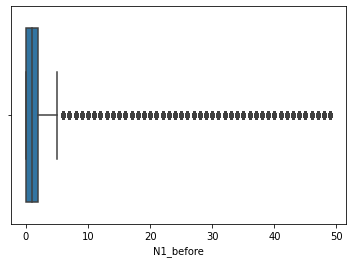

In [22]:
sns.boxplot(x='N1_before',
            data=source_code_data.loc[source_code_data['N1_before'] < 50]);

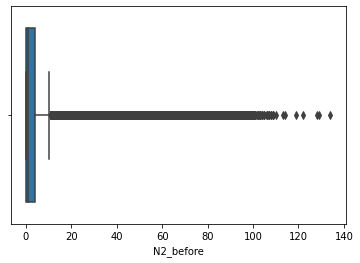

In [23]:
sns.boxplot(x='N2_before',
            data=source_code_data.loc[source_code_data['N1_before'] < 50]);

Подсчитаем отношение:

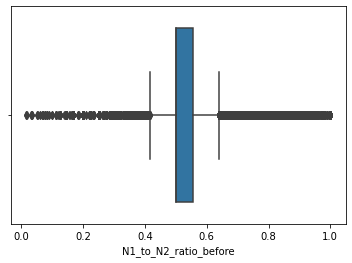

In [24]:
source_code_data['N1_to_N2_ratio_before'] = source_code_data['N1_before'] / source_code_data['N2_before']
sns.boxplot(x='N1_to_N2_ratio_before',
            data=source_code_data);

Подсчитаем некоторые статистики отношения:

In [26]:
print(f'Медиана отношения равна {source_code_data["N1_to_N2_ratio_before"].median()}.')
print(f'25-й персентиль отношения равен {source_code_data["N1_to_N2_ratio_before"].quantile(q=0.25)}.')
print(f'75-й персентиль отношения равен {source_code_data["N1_to_N2_ratio_before"].quantile(q=0.75)}.')
print(f'Минимум отношения равен {source_code_data["N1_to_N2_ratio_before"].min()}.')
print(f'Максимум отношения равен {source_code_data["N1_to_N2_ratio_before"].max()}.')

Медиана отношения равна 0.5.
25-й персентиль отношения равен 0.5.
75-й персентиль отношения равен 0.5555555555555556.
Минимум отношения равен 0.014705882352941176.
Максимум отношения равен 1.0.


Таким образом, на каждый оператор у 25% сниппетов приходится в точности два операнда и у 75% сниппетов этот показатель чуть больше двух.

Теперь выведем статистики по числу уникальных операторов и операндов, т.е. по метрикам $h_1$ и $h_2:$

In [27]:
print(f'Среднее значение h_1 равно {source_code_data["h1_before"].mean()}, а h_2 равно {source_code_data["h2_before"].mean()}.')
print(f'Медиана h_1 равна {source_code_data["h1_before"].median()}, а для h_2 равна {source_code_data["h2_before"].median()}.')
print(f'С.к.о h_1 равно {source_code_data["h1_before"].std()}, а для h_2 равно {source_code_data["h2_before"].std()}.')
print(f'25-й персентиль h_1 равен {source_code_data["h1_before"].quantile(q=0.25)}, а для h_2 равен {source_code_data["h2_before"].quantile(q=0.25)}.')
print(f'75-й персентиль h_1 равен {source_code_data["h1_before"].quantile(q=0.75)}, а для h_2 равен {source_code_data["h2_before"].quantile(q=0.75)}.')
print(f'90-й персентиль h_1 равен {source_code_data["h1_before"].quantile(q=0.90)}, а для h_2 равен {source_code_data["h2_before"].quantile(q=0.9)}.')
print(f'Минимум h_1 равен {source_code_data["h1_before"].min()}, а для h_2 равен {source_code_data["h2_before"].min()}.')
print(f'Максимум h_1 равен {source_code_data["h1_before"].max()}, а для h_2 равен {source_code_data["h2_before"].max()}')

Среднее значение h_1 равно 1.296008912169665, а h_2 равно 3.8393598307459857.
Медиана h_1 равна 1.0, а для h_2 равна 1.0.
С.к.о h_1 равно 1.9690731187635728, а для h_2 равно 32.62867870548052.
25-й персентиль h_1 равен 0.0, а для h_2 равен 0.0.
75-й персентиль h_1 равен 2.0, а для h_2 равен 4.0.
90-й персентиль h_1 равен 4.0, а для h_2 равен 10.0.
Минимум h_1 равен 0, а для h_2 равен 0.
Максимум h_1 равен 27, а для h_2 равен 62619


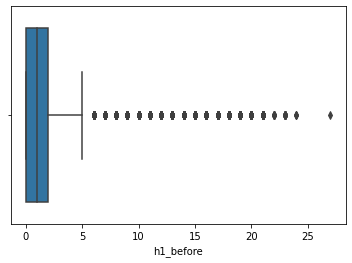

In [28]:
sns.boxplot(x='h1_before',
            data=source_code_data);

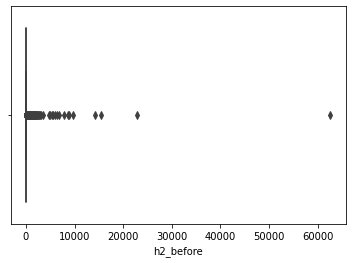

In [29]:
sns.boxplot(x='h2_before',
            data=source_code_data);

Подсчитаем отношение $h_1/h_2$

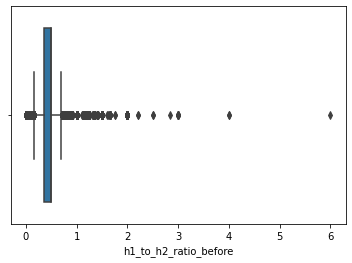

In [30]:
source_code_data['h1_to_h2_ratio_before'] = source_code_data['h1_before'] / source_code_data['h2_before']
sns.boxplot(x='h1_to_h2_ratio_before',
            data=source_code_data);

Подсчитаем некоторые статистики отношения:

In [31]:
print(f'Медиана отношения равна {source_code_data["h1_to_h2_ratio_before"].median()}.')
print(f'25-й персентиль отношения равен {source_code_data["h1_to_h2_ratio_before"].quantile(q=0.25)}.')
print(f'75-й персентиль отношения равен {source_code_data["h1_to_h2_ratio_before"].quantile(q=0.75)}.')
print(f'Минимум отношения равен {source_code_data["h1_to_h2_ratio_before"].min()}.')
print(f'Максимум отношения равен {source_code_data["h1_to_h2_ratio_before"].max()}.')

Медиана отношения равна 0.5.
25-й персентиль отношения равен 0.36363636363636365.
75-й персентиль отношения равен 0.5.
Минимум отношения равен 3.193918778645459e-05.
Максимум отношения равен 6.0.


Таким образом, у четверти сниппетов кода отношение $h_1/h_2=0.5,$ т.е. число различных операторов вдвое меньше числа различных операндов.

In [32]:
len(set(source_code_data.loc[source_code_data["N1_to_N2_ratio_before"] == 0.5].index) & set(source_code_data.loc[source_code_data["h1_to_h2_ratio_before"] == 0.5].index))

1120416

In [33]:
len(source_code_data.loc[source_code_data["N1_to_N2_ratio_before"] == 0.5].index)

1923083

In [34]:
len(source_code_data.loc[source_code_data["h1_to_h2_ratio_before"] == 0.5].index)

1227920

У подавляющего большинства сниппетов кода, у которых отношение $h_1/h_2=0.5,$ соответствующее отношение $N_1/N_2=0.5.$ Это сниппеты, у которых все проводимые в коде операции являются бинарными. Посмотрим на эти сниппеты:

In [36]:
df = source_code_data.loc[(source_code_data["h1_to_h2_ratio_before"] == 0.5) &
                          (source_code_data["N1_to_N2_ratio_before"] == 0.5)]
print(df.at[3500008, 'before_merge_without_docstrings'])

def validate_safe_path(value):
    
    base = "/input/"

    try:
        new_path = safe_join(base, value)
    except SuspiciousFileOperation:
        raise ValidationError("Relative paths are not allowed.")

    valid_path = new_path[len(base) :]

    if value != valid_path:
        raise ValidationError(f"Invalid file path, should be {valid_path}.")


In [57]:
print(df.loc[3500008, ['h1_before', 'h2_before', 'N1_before', 'N2_before']])

h1_before    1
h2_before    2
N1_before    1
N2_before    2
Name: 3500008, dtype: object


In [44]:
print(df[['h1_before', 'h2_before', 'N1_before', 'N2_before']])

         h1_before  h2_before  N1_before  N2_before
3500008          1          2          1          2
3500020          2          4          2          4
3500021          2          4          2          4
3500038          1          2          1          2
3500049          1          2          1          2
...            ...        ...        ...        ...
499972           1          2          1          2
499975           2          4          4          8
499988           1          2          1          2
499992           1          2          1          2
499997           1          2          1          2

[1120416 rows x 4 columns]


Посмотрим для скольки сниппетов $h_1=N_1$ и $h_2=N_2.$

In [45]:
df.loc[(df['h1_before'] == df['N1_before']) & (df['h2_before'] == df['N2_before'])].shape[0]

1055299

Таким образом, из примерно 5.8 миллионов сниппетов кода примерно 1 миллион, т.е. грубо в 18 процентах из них имеются только бинарные операции и каждая из них встречается ровно один раз.

## Корреляции

Подсчитаем корреляции между метриками Халстеда:

In [48]:
source_code_data[['h1_before', 'h2_before', 'N1_before', 'N2_before']].corr(method='spearman')

,h1_before,h2_before,N1_before,N2_before
h1_before,1.000000,0.983511,0.984822,0.982603
h2_before,0.983511,1.000000,0.994996,0.997640
N1_before,0.984822,0.994996,1.000000,0.997531
N2_before,0.982603,0.997640,0.997531,1.000000


Видно, что метрики тесно коррелированы.

## Производные метрики

Теперь посмотрим на производные метрики: vocabulary (сколько различных операторов и операндов), length (сколько всего операторов и операндов) и calculated_length по коду с ошибками (фактически последняя метрика это длина записи множества всех различных операторов и операндов).

In [58]:
print(f'Среднее значение vocabulary равно {source_code_data["vocabulary_before"].mean()}, для length равно {source_code_data["length_before"].mean()},\nа для calculated_length - {source_code_data["calculated_length_before"].mean()}.')
print(f'Медиана vocabulary равна {source_code_data["vocabulary_before"].median()}, для length равна {source_code_data["length_before"].median()},\nа для calculated_length - {source_code_data["calculated_length_before"].median()}.')
print(f'С.к.о vocabulary равно {source_code_data["vocabulary_before"].std()}, для length равно {source_code_data["length_before"].std()},\nа для calculated_length - {source_code_data["calculated_length_before"].std()}.')
print(f'25-й персентиль vocabulary равен {source_code_data["vocabulary_before"].quantile(q=0.25)}, для length равен {source_code_data["length_before"].quantile(q=0.25)},\nа для calculated_length - {source_code_data["calculated_length_before"].quantile(q=0.25)}.')
print(f'75-й персентиль vocabulary равен {source_code_data["vocabulary_before"].quantile(q=0.75)}, для length равен {source_code_data["length_before"].quantile(q=0.75)},\nа для calculated_length - {source_code_data["calculated_length_before"].quantile(q=0.75)}.')
print(f'90-й персентиль vocabulary равен {source_code_data["vocabulary_before"].quantile(q=0.90)}, для length равен {source_code_data["length_before"].quantile(q=0.9)},\nа для calculated_length - {source_code_data["calculated_length_before"].quantile(q=0.9)}.')
print(f'Минимум vocabulary равен {source_code_data["vocabulary_before"].min()}, для length равен {source_code_data["length_before"].min()},\nа для calculated_length - {source_code_data["calculated_length_before"].min()}.')
print(f'Максимум vocabulary равен {source_code_data["vocabulary_before"].max()}, для length равен {source_code_data["length_before"].max()},\nа для calculated_length - {source_code_data["calculated_length_before"].max()}.')

Среднее значение vocabulary равно 5.1353687429156505, для length равно 7.80008368946452,
а для calculated_length - 17.242744301500625.
Медиана vocabulary равна 2.0, для length равна 2.0,
а для calculated_length - 0.0.
С.к.о vocabulary равно 33.118727858245784, для length равно 94.26574156747195,
а для calculated_length - 478.3982067905256.
25-й персентиль vocabulary равен 0.0, для length равен 0.0,
а для calculated_length - 0.0.
75-й персентиль vocabulary равен 6.0, для length равен 6.0,
а для calculated_length - 10.0.
90-й персентиль vocabulary равен 14.0, для length равен 19.0,
а для calculated_length - 40.13896548741762.
Минимум vocabulary равен 0, для length равен 0,
а для calculated_length - 0.0.
Максимум vocabulary равен 62621, для length равен 161748,
а для calculated_length - 997792.7362887807.


Поскольку 25-е персентили по сырым метрикам Халстеда равны по 1, то 25-й персентиль по метрикам равен 0.

Видно, что распределения метрик length  и calculated_length имеют тяжелый правый хвост, поскольку их среднее больше 75 персентиля. Подсчитаем количество выбросов:

In [60]:
Halstead_metrics_names = ['length', 'calculated_length']

for col_name in Halstead_metrics_names:
    inter_quartile_range = source_code_data[col_name + '_before'].quantile(q=0.75) - source_code_data[col_name + '_before'].quantile(q=0.25)
    outlier_count = source_code_data.loc[source_code_data[col_name + '_before'] > source_code_data[col_name + '_before'].quantile(q=0.75) + 1.5 * inter_quartile_range].shape[0]
    print(f'Процент выбросов по метрике {col_name} равен {100 * outlier_count / source_code_data.shape[0]}')

Процент выбросов по метрике length равен 12.113946583855
Процент выбросов по метрике calculated_length равен 14.732413450082664


## Корреляции

Вначале корреляции между метриками.

In [61]:
source_code_data[['sloc_before', 'lloc_before', 'vocabulary_before', 'length_before', 'calculated_length_before']].corr(method='spearman')

,sloc_before,lloc_before,vocabulary_before,length_before,calculated_length_before
sloc_before,1.000000,0.929184,0.649492,0.652517,0.637086
lloc_before,0.929184,1.000000,0.673503,0.676288,0.659167
vocabulary_before,0.649492,0.673503,1.000000,0.997163,0.984903
length_before,0.652517,0.676288,0.997163,1.000000,0.981019
calculated_length_before,0.637086,0.659167,0.984903,0.981019,1.000000


Как видно, производные метрики Халстеда между собой тесно коррелированы. Также есть достаточно большая корреляция с длиной кода в строках и числом утверждений.

## Метрики Халстеда сложности кода

Посмотрим теперь на метрики сложности кода. Это метрики bugs, difficulty, volume, effort и time. Подсчитаем их статистики по коду:

In [62]:
print(f'Среднее значение bugs равно {source_code_data["bugs_before"].mean()}, для difficulty равно {source_code_data["difficulty_before"].mean()}.')
print(f'Медиана bugs равна {source_code_data["bugs_before"].median()}, для difficulty равна {source_code_data["difficulty_before"].median()}.')
print(f'С.к.о bugs равно {source_code_data["bugs_before"].std()}, для difficulty равно {source_code_data["difficulty_before"].std()}.')
print(f'25-й персентиль bugs равен {source_code_data["bugs_before"].quantile(q=0.25)}, для difficulty равен {source_code_data["difficulty_before"].quantile(q=0.25)}.')
print(f'75-й персентиль bugs равен {source_code_data["bugs_before"].quantile(q=0.75)}, для difficulty равен {source_code_data["difficulty_before"].quantile(q=0.75)}.')
print(f'90-й персентиль bugs равен {source_code_data["bugs_before"].quantile(q=0.90)}, для difficulty равен {source_code_data["difficulty_before"].quantile(q=0.9)}.')
print(f'Минимум bugs равен {source_code_data["bugs_before"].min()}, для difficulty равен {source_code_data["difficulty_before"].min()}.')
print(f'Максимум bugs равен {source_code_data["bugs_before"].max()}, для difficulty равен {source_code_data["difficulty_before"].max()}.')

Среднее значение bugs равно 0.011752247532013278, для difficulty равно 0.8209427769964651.
Медиана bugs равна 0.0006666666666666666, для difficulty равна 0.5.
С.к.о bugs равно 0.44783936011988257, для difficulty равно 1.4752281772862548.
25-й персентиль bugs равен 0.0, для difficulty равен 0.0.
75-й персентиль bugs равен 0.005169925001442312, для difficulty равен 1.0.
90-й персентиль bugs равен 0.02344134357365111, для difficulty равен 2.4.
Минимум bugs равен 0.0, для difficulty равен 0.0.
Максимум bugs равен 859.1168958934705, для difficulty равен 603.25.


Среднее значение bugs больше 75-го персентиля, т.е. для метрики bugs есть много больших выбросов. Подсчитаем их количество:

In [63]:
advanced_Halstead_metrics_names = ['bugs']

for col_name in advanced_Halstead_metrics_names:
    inter_quartile_range = source_code_data[col_name + '_before'].quantile(q=0.75) - source_code_data[col_name + '_before'].quantile(q=0.25)
    outlier_count = source_code_data.loc[source_code_data[col_name + '_before'] > source_code_data[col_name + '_before'].quantile(q=0.75) + 1.5 * inter_quartile_range].shape[0]
    print(f'Процент выбросов по метрике {col_name} равен {100 * outlier_count / source_code_data.shape[0]}')

Процент выбросов по метрике bugs равен 16.036752359324232


Посмотрим на код выбросов:

In [67]:
bugs_inter_quartile_range = source_code_data['bugs_before'].quantile(q=0.75) - source_code_data['bugs_before'].quantile(q=0.25)
print(source_code_data.loc[source_code_data['bugs_before'] > source_code_data['bugs_before'].quantile(q=0.75) + 1.5 * bugs_inter_quartile_range].loc[0, 'before_merge_without_docstrings'])

    def raw_serialize(self):
        result = b''
        for cmd in self.cmds:
            if type(cmd) == int:  
                result += int_to_little_endian(cmd, 1)
            else:
                length = len(cmd)
                if length < 75:  
                    result += int_to_little_endian(length, 1)
                elif length > 75 and length < 0x100:  
                    result += int_to_little_endian(76, 1)
                    result += int_to_little_endian(length, 1)
                elif length >= 0x100 and length <= 520:  
                    result += int_to_little_endian(77, 1)
                    result += int_to_little_endian(length, 2)
                else:  
                    raise ValueError('too long an cmd')
                result += cmd
        return result


Теперь подсчитаем статистики по оставшимся трем метрикам, рассчитанным по коду:

In [64]:
print(f'Среднее значение volume равно {source_code_data["volume_before"].mean()}, для effort равно {source_code_data["effort_before"].mean()},\nа для time - {source_code_data["time_before"].mean()}.')
print(f'Медиана volume равна {source_code_data["volume_before"].median()}, для effort равна {source_code_data["effort_before"].median()},\nа для time - {source_code_data["time_before"].median()}.')
print(f'С.к.о volume равно {source_code_data["volume_before"].std()}, для effort равно {source_code_data["effort_before"].std()},\nа для time - {source_code_data["time_before"].std()}.')
print(f'25-й персентиль volume равен {source_code_data["volume_before"].quantile(q=0.25)}, для effort равен {source_code_data["effort_before"].quantile(q=0.25)},\nа для time - {source_code_data["time_before"].quantile(q=0.25)}.')
print(f'75-й персентиль volume равен {source_code_data["volume_before"].quantile(q=0.75)}, для effort равен {source_code_data["effort_before"].quantile(q=0.75)},\nа для time - {source_code_data["time_before"].quantile(q=0.75)}.')
print(f'90-й персентиль volume равен {source_code_data["volume_before"].quantile(q=0.90)}, для effort равен {source_code_data["effort_before"].quantile(q=0.9)},\nа для time - {source_code_data["time_before"].quantile(q=0.9)}.')
print(f'Минимум volume равен {source_code_data["volume_before"].min()}, для effort равен {source_code_data["effort_before"].min()},\nа для time - {source_code_data["time_before"].min()}.')
print(f'Максимум volume равен {source_code_data["volume_before"].max()}, для effort равен {source_code_data["effort_before"].max()},\nа для time - {source_code_data["time_before"].max()}.')

Среднее значение volume равно 35.25674259603984, для effort равно 176.88453720813786,
а для time - 9.826918733785439.
Медиана volume равна 2.0, для effort равна 1.0,
а для time - 0.05555555555555555.
С.к.о volume равно 1343.5180803596472, для effort равно 6903.507159436526,
а для time - 383.5281755242516.
25-й персентиль volume равен 0.0, для effort равен 0.0,
а для time - 0.0.
75-й персентиль volume равен 15.509775004326936, для effort равен 15.673014640489694,
а для time - 0.8707230355827608.
90-й персентиль volume равен 70.32403072095333, для effort равен 166.09640474436813,
а для time - 9.227578041353786.
Минимум volume равен 0.0, для effort равен 0.0,
а для time - 0.0.
Максимум volume равен 2577350.6876804116, для effort равен 13671752.93365189,
а для time - 759541.8296473273.


Средние значения всех трех метрик заметно больше, чем 75-й персентиль, т.е. в данных присутствует много больших выбросов по этим метрикам.

Подсчитаем процент выбросов по этим метрикам (вне non-outlier range в большую сторону).

In [65]:
advanced_Halstead_metrics_names = ['volume', 'effort', 'time']

for col_name in advanced_Halstead_metrics_names:
    inter_quartile_range = source_code_data[col_name + '_before'].quantile(q=0.75) - source_code_data[col_name + '_before'].quantile(q=0.25)
    outlier_count = source_code_data.loc[source_code_data[col_name + '_before'] > source_code_data[col_name + '_before'].quantile(q=0.75) + 1.5 * inter_quartile_range].shape[0]
    print(f'Процент выбросов по метрике {col_name} равен {100 * outlier_count / source_code_data.shape[0]}')

Процент выбросов по метрике volume равен 16.036752359324232
Процент выбросов по метрике effort равен 19.781993770511974
Процент выбросов по метрике time равен 19.78197653627299


Таким образом, код сниппетов на 15-20% состоит из достаточно сложного кода. Посмотрим на код выбросов:

In [68]:
effort_inter_quartile_range = source_code_data['effort_before'].quantile(q=0.75) - source_code_data['effort_before'].quantile(q=0.25)
print(source_code_data.loc[source_code_data['effort_before'] > source_code_data['effort_before'].quantile(q=0.75) + 1.5 * effort_inter_quartile_range].loc[0, 'before_merge_without_docstrings'])

    def raw_serialize(self):
        result = b''
        for cmd in self.cmds:
            if type(cmd) == int:  
                result += int_to_little_endian(cmd, 1)
            else:
                length = len(cmd)
                if length < 75:  
                    result += int_to_little_endian(length, 1)
                elif length > 75 and length < 0x100:  
                    result += int_to_little_endian(76, 1)
                    result += int_to_little_endian(length, 1)
                elif length >= 0x100 and length <= 520:  
                    result += int_to_little_endian(77, 1)
                    result += int_to_little_endian(length, 2)
                else:  
                    raise ValueError('too long an cmd')
                result += cmd
        return result


Таким образом, 80% сниппетов кода имеют невысокую сложность.

## Корреляции

Вначале корреляции между метриками.

In [69]:
source_code_data[['bugs_before', 'difficulty_before', 'volume_before', 'effort_before', 'time_before', 'sloc_before', 'lloc_before']].corr(method='spearman')

,bugs_before,difficulty_before,volume_before,effort_before,time_before,sloc_before,lloc_before
bugs_before,1.000000,0.988202,1.000000,0.998292,0.998292,0.651871,0.675750
difficulty_before,0.988202,1.000000,0.988202,0.994460,0.994460,0.646441,0.672946
volume_before,1.000000,0.988202,1.000000,0.998292,0.998292,0.651871,0.675750
effort_before,0.998292,0.994460,0.998292,1.000000,1.000000,0.651119,0.675813
time_before,0.998292,0.994460,0.998292,1.000000,1.000000,0.651119,0.675813
sloc_before,0.651871,0.646441,0.651871,0.651119,0.651119,1.000000,0.929184
lloc_before,0.675750,0.672946,0.675750,0.675813,0.675813,0.929184,1.000000


Как видно, производные метрики Халстеда между собой тесно коррелированы. Также есть достаточно большая корреляция с длиной кода в строках и числом утверждений.

# Цикломатическая сложность и индекс исправляемости кода

Теперь подсчитаем статистики метрики цикломатической сложности (cc) и метрики исправляемости кода (MI) по коду с ошибками.
Цикломатическая сложность - число линейно независимых маршрутов через код. Если в коде имеется один оператор if, то имеется два таких маршрута. Нужно для вычисления покрываемости тестами. Имеется следующая дискретизация значений:

1 - 5	A (low risk - simple block)

6 - 10	B (low risk - well structured and stable block)

11 - 20	C (moderate risk - slightly complex block)

21 - 30	D (more than moderate risk - more complex block)

31 - 40	E (high risk - complex block, alarming)

41+	F (very high risk - error-prone, unstable block)

In [70]:
print(f'Среднее значение cc равно {source_code_data["cc_before"].mean()}.')
print(f'Медиана cc равна {source_code_data["cc_before"].median()}.')
print(f'С.к.о cc равно {source_code_data["cc_before"].std()}.')
print(f'25-й персентиль cc равен {source_code_data["cc_before"].quantile(q=0.25)}.')
print(f'75-й персентиль cc равен {source_code_data["cc_before"].quantile(q=0.75)}.')
print(f'90-й персентиль cc равен {source_code_data["cc_before"].quantile(q=0.90)}.')
print(f'Минимум cc равен {source_code_data["cc_before"].min()}.')
print(f'Максимум cc равен {source_code_data["cc_before"].max()}.')

Среднее значение cc равно 2.155952283907202.
Медиана cc равна 1.0.
С.к.о cc равно 5.654977515778433.
25-й персентиль cc равен 0.0.
75-й персентиль cc равен 2.0.
90-й персентиль cc равен 6.0.
Минимум cc равен 0.
Максимум cc равен 2640.


Таким образом, 75% сниппетов имеют низкую сложность, т.е. очень простую структуру, 15% имеют хорошую структуру невысокой сложности.

Построим диаграмму частот для дискретизации, описанной выше.

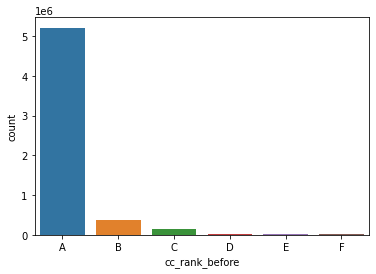

In [71]:
ax = sns.countplot(x='cc_rank_before',
                   data=source_code_data,
                   order=np.sort(source_code_data['cc_rank_before'].unique()));

Теперь тоже самое для индекса исправляемости кода, который служит для оценки масштабируемости, поддерживаемости и улучшаемости кода:

In [72]:
print(f'Среднее значение MI равно {source_code_data["MI_before"].mean()}.')
print(f'Медиана MI равна {source_code_data["MI_before"].median()}.')
print(f'С.к.о MI равно {source_code_data["MI_before"].std()}.')
print(f'25-й персентиль MI равен {source_code_data["MI_before"].quantile(q=0.25)}.')
print(f'75-й персентиль MI равен {source_code_data["MI_before"].quantile(q=0.75)}.')
print(f'90-й персентиль MI равен {source_code_data["MI_before"].quantile(q=0.90)}.')
print(f'Минимум MI равен {source_code_data["MI_before"].min()}.')
print(f'Максимум MI равен {source_code_data["MI_before"].max()}.')

Среднее значение MI равно 87.2535122301486.
Медиана MI равна 100.0.
С.к.о MI равно 15.27091913479439.
25-й персентиль MI равен 74.7795560288449.
75-й персентиль MI равен 100.0.
90-й персентиль MI равен 100.0.
Минимум MI равен 0.0.
Максимум MI равен 100.0.


## Корреляции

Вначале корреляции между метриками.

In [73]:
source_code_data[['cc_before', 'MI_before']].corr(method='spearman')

,cc_before,MI_before
cc_before,1.000000,-0.721796
MI_before,-0.721796,1.000000


Как видно, эти метрики между собой достаточно тесно коррелированы. 

# Сравнение метрик на обучающем, валидационном и тестовом датасетах

In [3]:
source_code_data_train = pd.read_pickle(path_to_data + 'correct_source_code_train_metrics.pickle')
source_code_data_valid = pd.read_pickle(path_to_data + 'correct_source_code_valid_metrics.pickle')
source_code_data_test = pd.read_pickle(path_to_data + 'correct_source_code_test_metrics.pickle')

In [6]:
source_code_data_train = source_code_data_train.dropna()
source_code_data_valid = source_code_data_valid.dropna()

In [22]:
train_length = source_code_data_train.shape[0]
valid_length = source_code_data_valid.shape[0]
test_length = source_code_data_test.shape[0]

all_source_code_data = pd.concat((source_code_data_train,
                                  source_code_data_valid,
                                  source_code_data_test), axis=0)
all_source_code_data['sample_index'] = np.array((['train'] * train_length + 
                                                 ['valid'] * valid_length +
                                                 ['test'] * test_length))

In [5]:
metrics_names = ['cc', 'N1', 'N2',
       'bugs', 'calculated_length', 'difficulty', 
       'effort', 'h1', 'h2', 'length', 'time',
       'vocabulary', 'volume', 'blank', 'single_comments',
       'lloc', 'loc', 'multi', 'sloc', 'MI']

# Функция оценки множественной статистической значимости различий выборок

In [6]:
from scipy.stats import kruskal, ks_2samp, mannwhitneyu
from statsmodels.stats.multitest import multipletests

In [7]:
def significantFeatures(data_samples, 
                        features, 
                        test_function,
                        test_key_params={},
                        remove_outliers=False,
                        confidence_level=0.05):
    p_values = []
    for feature_name in features:
        p_values.append(test_function(*[data_sample[feature_name] for data_sample in data_samples],
                                      **test_key_params)[1])
    is_feature_predictive, features_p_values_corrected, _, _ = multipletests(p_values, 
                                                                             alpha=confidence_level,
                                                                             method='fdr_bh',
                                                                             returnsorted=False)
    return [feature_name for i, feature_name in enumerate(features) if is_feature_predictive[i]], features_p_values_corrected

Применим для оценки статистической значимости отличий по метрикам статистический критерий Краскла-Уоллиса для трех независимых выборок.

In [13]:
kw_predictive_metrics_names, kw_p_values = significantFeatures([source_code_data_train,
                                                                source_code_data_valid,
                                                                source_code_data_test],
                                                               [metric_name + '_before' for metric_name in metrics_names],
                                                               test_function=kruskal,
                                                               confidence_level=0.05)

In [14]:
for feature, p_value in zip(kw_predictive_metrics_names, kw_p_values):
    print(feature, p_value)

cc_before 2.487066244606366e-36
N1_before 2.2156571135646837e-42
N2_before 8.276270044227602e-43
bugs_before 5.6169699879719355e-43
calculated_length_before 1.4841552678976116e-39
difficulty_before 1.7363896795233023e-36
effort_before 5.828881999668042e-40
h1_before 1.929587676482887e-39
h2_before 3.8130584772986574e-45
length_before 1.0413581427941841e-42
time_before 5.828881999668042e-40
vocabulary_before 9.027731157757084e-44
volume_before 5.6169699879719355e-43
blank_before 0.0
single_comments_before 3.8888764606660476e-07
lloc_before 1.2827277967942416e-77
loc_before 3.9939700903710414e-174
multi_before 1.8203431680268133e-161
sloc_before 1.185991435001392e-47
MI_before 2.0074652412178625e-82


Теперь оценим значимость попарных различий:

In [15]:
mw_predictive_metrics_names, mw_p_values = significantFeatures([source_code_data_train,
                                                                source_code_data_valid],
                                                               [metric_name + '_before' for metric_name in metrics_names],
                                                               test_function=mannwhitneyu)

In [16]:
for metric_name, p_value in zip(mw_predictive_metrics_names, mw_p_values):
    print(metric_name, p_value)

cc_before 6.705971984607311e-30
N1_before 1.51887481902354e-33
N2_before 3.0179654713888957e-34
bugs_before 3.0179654713888957e-34
calculated_length_before 1.8914053674503852e-30
difficulty_before 2.3939854024528914e-28
effort_before 2.9219420959084645e-31
h1_before 9.115765701759685e-31
h2_before 3.990532025495247e-36
length_before 5.394007778619561e-34
time_before 2.9219420959084645e-31
vocabulary_before 9.304787639978716e-35
volume_before 3.0179654713888957e-34
blank_before 0.0
single_comments_before 3.8394754528771006e-08
lloc_before 9.223256792374073e-75
loc_before 8.183361223173643e-175
multi_before 3.235557762254828e-162
sloc_before 3.1205927275147026e-46
MI_before 1.1497964682065141e-74


По всем метрикам разница между обучающим и валидационным датасетами значима. Ниже мы визуально оценим величину этих различий.

In [17]:
mw_predictive_metrics_names, mw_p_values = significantFeatures([source_code_data_train,
                                                                source_code_data_test],
                                                               [metric_name + '_before' for metric_name in metrics_names],
                                                               test_function=mannwhitneyu)

In [18]:
for metric_name, p_value in zip(mw_predictive_metrics_names, mw_p_values):
    print(metric_name, p_value)

cc_before 5.97310931280218e-09
N1_before 1.6726468432701936e-12
N2_before 1.693681332415347e-12
bugs_before 1.6726468432701936e-12
calculated_length_before 1.6726468432701936e-12
difficulty_before 5.599221140542369e-12
effort_before 1.6726468432701936e-12
h1_before 1.693681332415347e-12
h2_before 1.6726468432701936e-12
length_before 1.6726468432701936e-12
time_before 1.6726468432701936e-12
vocabulary_before 1.6726468432701936e-12
volume_before 1.6726468432701936e-12
lloc_before 0.23920553040292214
loc_before 0.18968160555350644
sloc_before 4.943505725232473e-07
MI_before 0.0018225192880591396


Разница между валидационным и тестовым датасетами значима по всем метрикам кроме числа строк кода и числа утверждений (числом логических строк кода).

In [19]:
mw_predictive_metrics_names, mw_p_values = significantFeatures([source_code_data_valid,
                                                                source_code_data_test],
                                                               [metric_name + '_before' for metric_name in metrics_names],
                                                               test_function=mannwhitneyu)

In [24]:
for metric_name, p_value in zip(mw_predictive_metrics_names, mw_p_values):
    print(metric_name, p_value)

cc_before 1.1409762519455408e-09
N1_before 9.52645223349209e-12
N2_before 1.1181033549198523e-11
bugs_before 9.52645223349209e-12
calculated_length_before 9.52645223349209e-12
difficulty_before 2.6418286787179044e-11
effort_before 9.52645223349209e-12
h1_before 9.7579027975844e-12
h2_before 9.52645223349209e-12
length_before 9.52645223349209e-12
time_before 9.52645223349209e-12
vocabulary_before 9.52645223349209e-12
volume_before 9.52645223349209e-12
lloc_before 0.06178496494976244
loc_before 0.21505497893601722
multi_before 4.863125951571525e-06
sloc_before 0.012922638216302922
MI_before 0.012922638216302922


Таким образом, разница между обучающей и валидационной, между обучающей и тестовой выборками, а также между валидационной и тестовой статистически значима по большинству метрик,  даже несмотря на то, что валидационная и тестовая выборки содержат код из одних и тех же репозиториев. Разница между валидационной выборкой и тестовой незначима по числу строк и числу логических строк кода.

Видно, что по большинству метрик выборки отличаются. Посмотрим на размер этих отличий с помощью графиков. Вначале для цикломатической сложности.

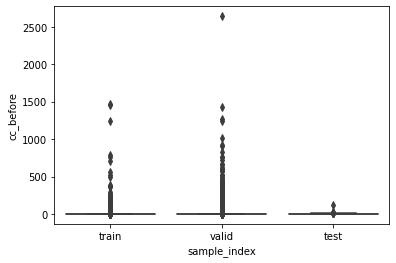

In [25]:
sns.boxplot(x='sample_index', y='cc_before',
            data=all_source_code_data);

Уберем выбросы:

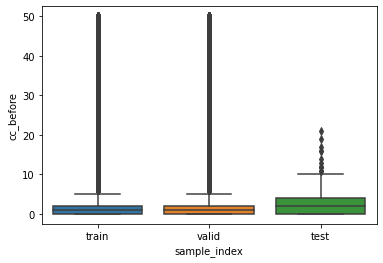

In [26]:
sns.boxplot(x='sample_index', y='cc_before',
            data=all_source_code_data.loc[all_source_code_data['cc_before'] <= 50]);

Цикломатическая сложность немного больше для тестовой выборки.

Теперь для $N_1,$ числа операторов:

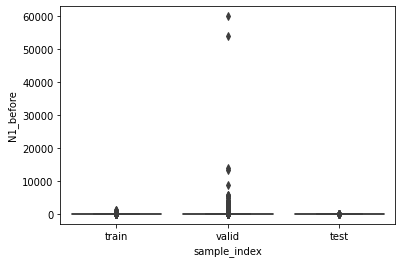

In [27]:
sns.boxplot(x='sample_index', y='N1_before',
            data=all_source_code_data);

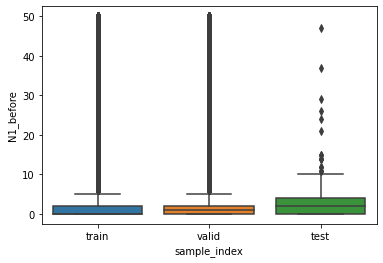

In [28]:
sns.boxplot(x='sample_index', y='N1_before',
            data=all_source_code_data.loc[all_source_code_data['N1_before'] <= 50]);

Число операторов в тестовой выборке немного больше.

Теперь для числа операндов $N_2:$

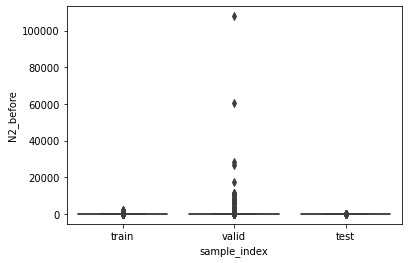

In [29]:
sns.boxplot(x='sample_index', y='N2_before',
            data=all_source_code_data);

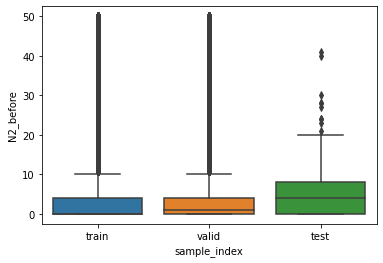

In [30]:
sns.boxplot(x='sample_index', y='N2_before',
            data=all_source_code_data.loc[all_source_code_data['N2_before'] <= 50]);

Число операндов в тестовой выборке несколько выше.

Теперь для числа уникальных операторов $h_1:$

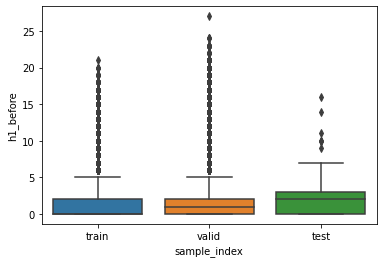

In [31]:
sns.boxplot(x='sample_index', y='h1_before',
            data=all_source_code_data);

По числу различных операторов видим определенное различие: у обучающей выборки наименьшее число операторов, затем идет валидационная, а затем тестовая.

Теперь для числа уникальных операндов $h_2:$

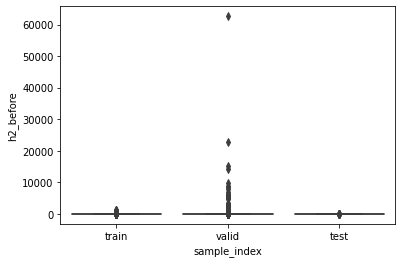

In [32]:
sns.boxplot(x='sample_index', y='h2_before',
            data=all_source_code_data);

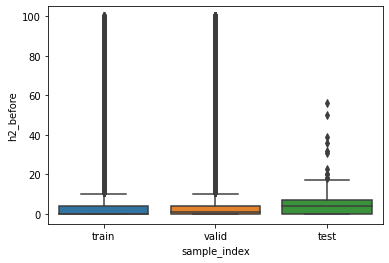

In [33]:
sns.boxplot(x='sample_index', y='h2_before',
            data=all_source_code_data.loc[all_source_code_data['h2_before'] <= 100]);

По числу различных операндов видим определенное различие: у обучающей выборки наименьшее число операторов, затем идет валидационная, а затем тестовая.

Теперь для vocabulary, length и calculated_length:

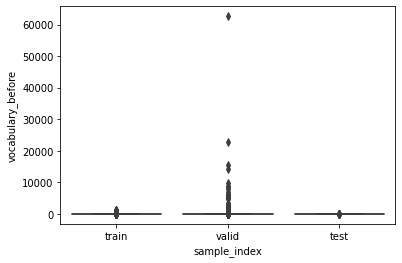

In [34]:
sns.boxplot(x='sample_index', y='vocabulary_before',
            data=all_source_code_data);

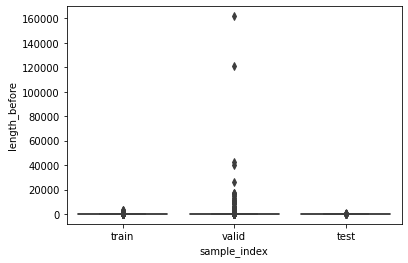

In [35]:
sns.boxplot(x='sample_index', y='length_before',
            data=all_source_code_data);

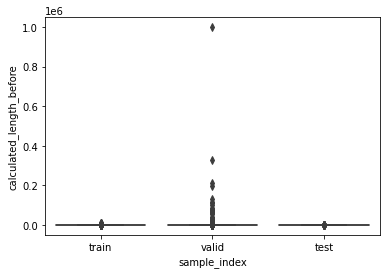

In [36]:
sns.boxplot(x='sample_index', y='calculated_length_before',
            data=all_source_code_data);

После удаления выбросов:

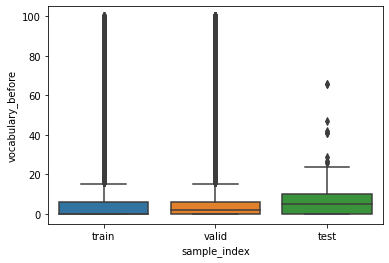

In [37]:
sns.boxplot(x='sample_index', y='vocabulary_before',
            data=all_source_code_data.loc[all_source_code_data['vocabulary_before'] <= 100]);

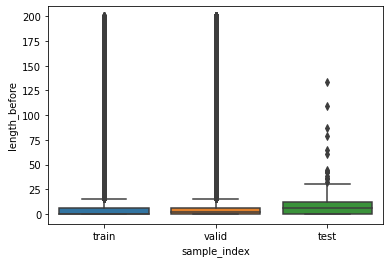

In [38]:
sns.boxplot(x='sample_index', y='length_before',
            data=all_source_code_data.loc[all_source_code_data['length_before'] <= 200]);

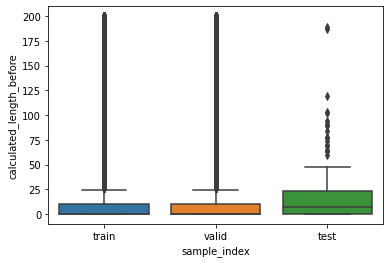

In [39]:
sns.boxplot(x='sample_index', y='calculated_length_before',
            data=all_source_code_data.loc[all_source_code_data['calculated_length_before'] <= 200]);

По всем метрикам видим тот же паттерн, что наблюдался на метриках числа операторов и операндов: у обучающей выборки наименьшее значение метрики, затем идет валидационная, а затем тестовая.

Теперь для bugs, difficulty, effort, volume и time:

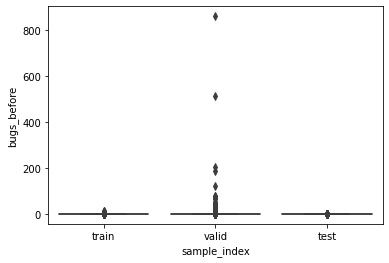

In [40]:
sns.boxplot(x='sample_index', y='bugs_before',
            data=all_source_code_data);

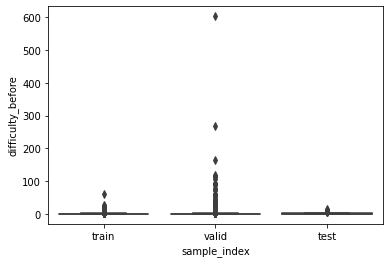

In [41]:
sns.boxplot(x='sample_index', y='difficulty_before',
            data=all_source_code_data);

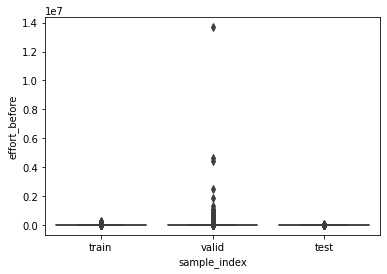

In [42]:
sns.boxplot(x='sample_index', y='effort_before',
            data=all_source_code_data);

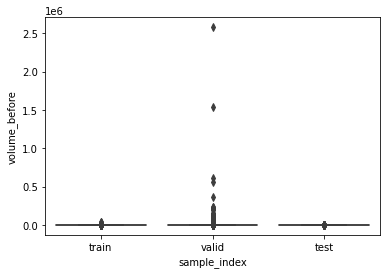

In [43]:
sns.boxplot(x='sample_index', y='volume_before',
            data=all_source_code_data);

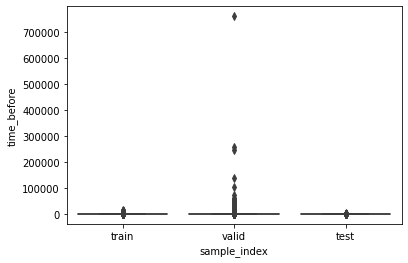

In [44]:
sns.boxplot(x='sample_index', y='time_before',
            data=all_source_code_data);

Теперь удалим выбросы:

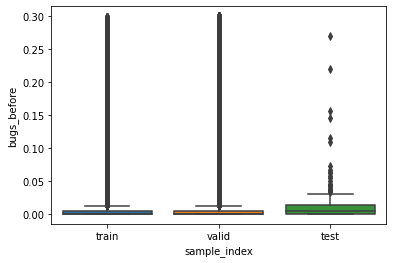

In [45]:
sns.boxplot(x='sample_index', y='bugs_before',
            data=all_source_code_data.loc[all_source_code_data['bugs_before'] <= 0.3]);

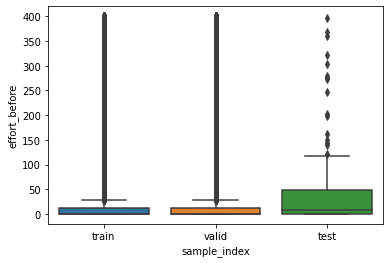

In [46]:
sns.boxplot(x='sample_index', y='effort_before',
            data=all_source_code_data.loc[all_source_code_data['effort_before'] <= 400]);

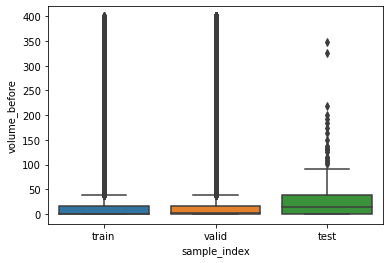

In [47]:
sns.boxplot(x='sample_index', y='volume_before',
            data=all_source_code_data.loc[all_source_code_data['volume_before'] <= 400]);

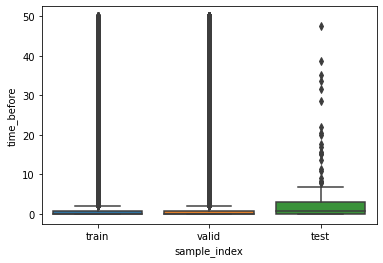

In [48]:
sns.boxplot(x='sample_index', y='time_before',
            data=all_source_code_data.loc[all_source_code_data['time_before'] <= 50]);

По всем метрикам видим тот же паттерн, что наблюдался на метриках числа операторов и операндов: у обучающей выборки наименьшее значение метрики, затем идет валидационная, а затем тестовая.

Теперь по метрикам blank, single_comments, lloc, loc, multi и sloc.

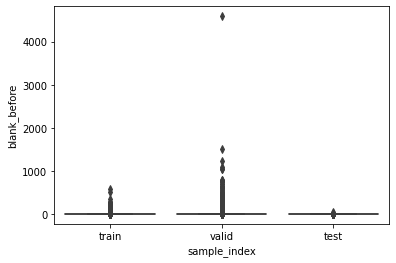

In [49]:
sns.boxplot(x='sample_index', y='blank_before',
            data=all_source_code_data);

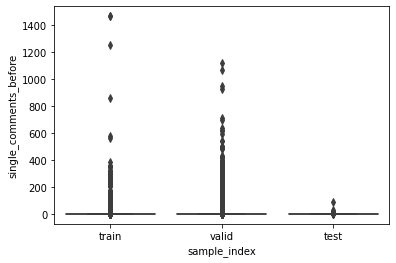

In [50]:
sns.boxplot(x='sample_index', y='single_comments_before',
            data=all_source_code_data);

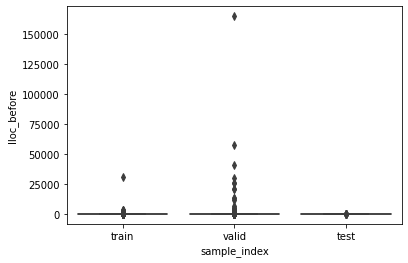

In [51]:
sns.boxplot(x='sample_index', y='lloc_before',
            data=all_source_code_data);

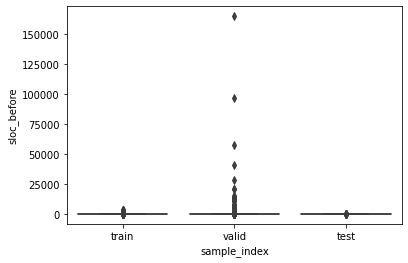

In [52]:
sns.boxplot(x='sample_index', y='sloc_before',
            data=all_source_code_data);

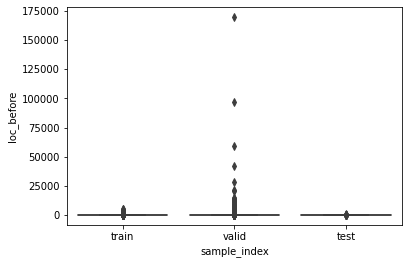

In [53]:
sns.boxplot(x='sample_index', y='loc_before',
            data=all_source_code_data);

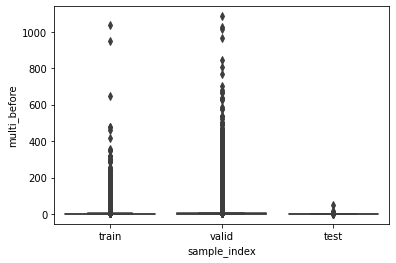

In [54]:
sns.boxplot(x='sample_index', y='multi_before',
            data=all_source_code_data);

Теперь удалим выбросы:

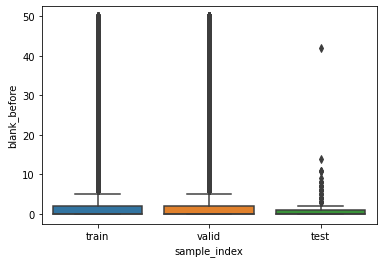

In [55]:
sns.boxplot(x='sample_index', y='blank_before',
            data=all_source_code_data.loc[all_source_code_data['blank_before'] <= 50]);

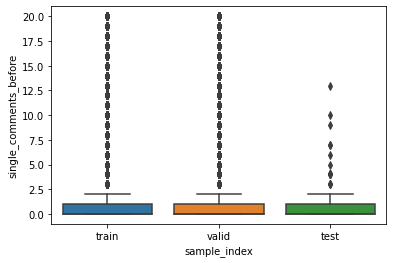

In [56]:
sns.boxplot(x='sample_index', y='single_comments_before',
            data=all_source_code_data.loc[all_source_code_data['single_comments_before'] <= 20]);

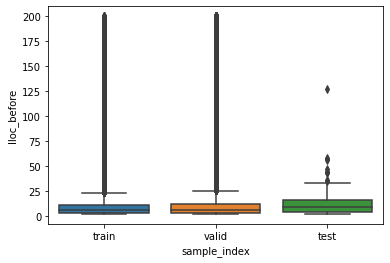

In [57]:
sns.boxplot(x='sample_index', y='lloc_before',
            data=all_source_code_data.loc[all_source_code_data['lloc_before'] <= 200]);

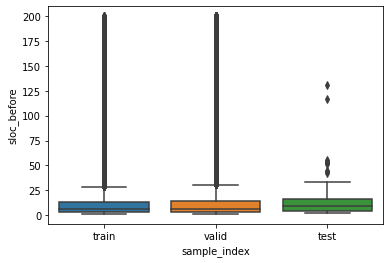

In [58]:
sns.boxplot(x='sample_index', y='sloc_before',
            data=all_source_code_data.loc[all_source_code_data['sloc_before'] <= 200]);

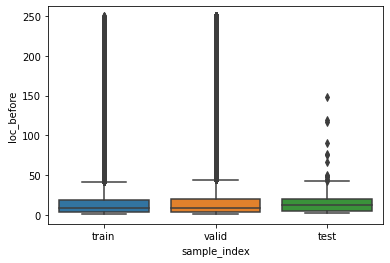

In [59]:
sns.boxplot(x='sample_index', y='loc_before',
            data=all_source_code_data.loc[all_source_code_data['loc_before'] <= 250]);

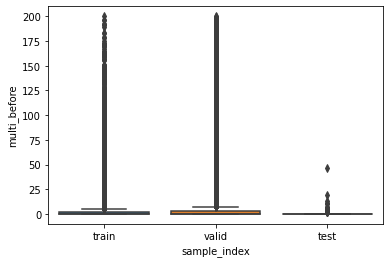

In [60]:
sns.boxplot(x='sample_index', y='multi_before',
            data=all_source_code_data.loc[all_source_code_data['multi_before'] <= 200]);

Теперь для индекса исправляемости:

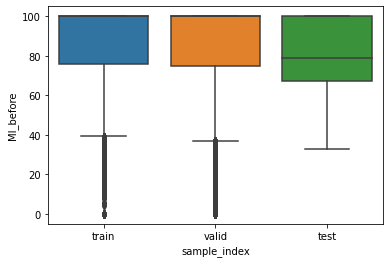

In [61]:
sns.boxplot(x='sample_index', y='MI_before',
            data=all_source_code_data);

Наиболее значимые отличия между тестовой выборкой и остальными по метрикам: N2, h1, h2, vocabulary, length, calculated length, bugs, volumne, time. По остальным метрикам разница небольшая. Таким образом, тестовая выборка содержит сниппеты несколько более высокой сложности, чем сниппеты в обучающей и валидационных выборках.